In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn

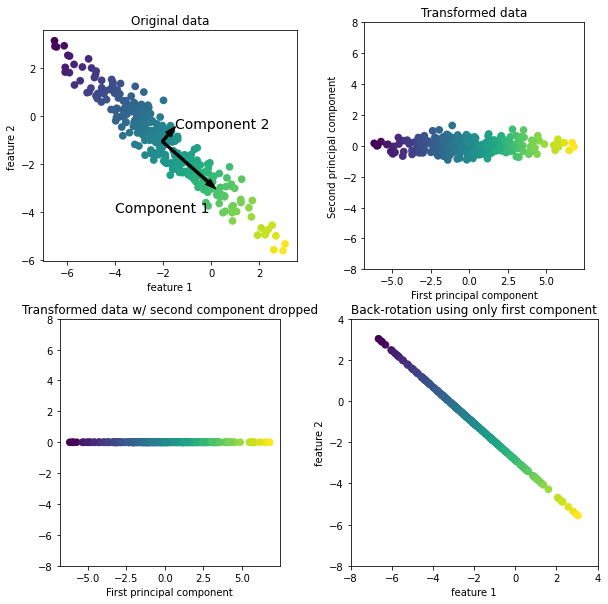

In [2]:
mglearn.plots.plot_pca_illustration()

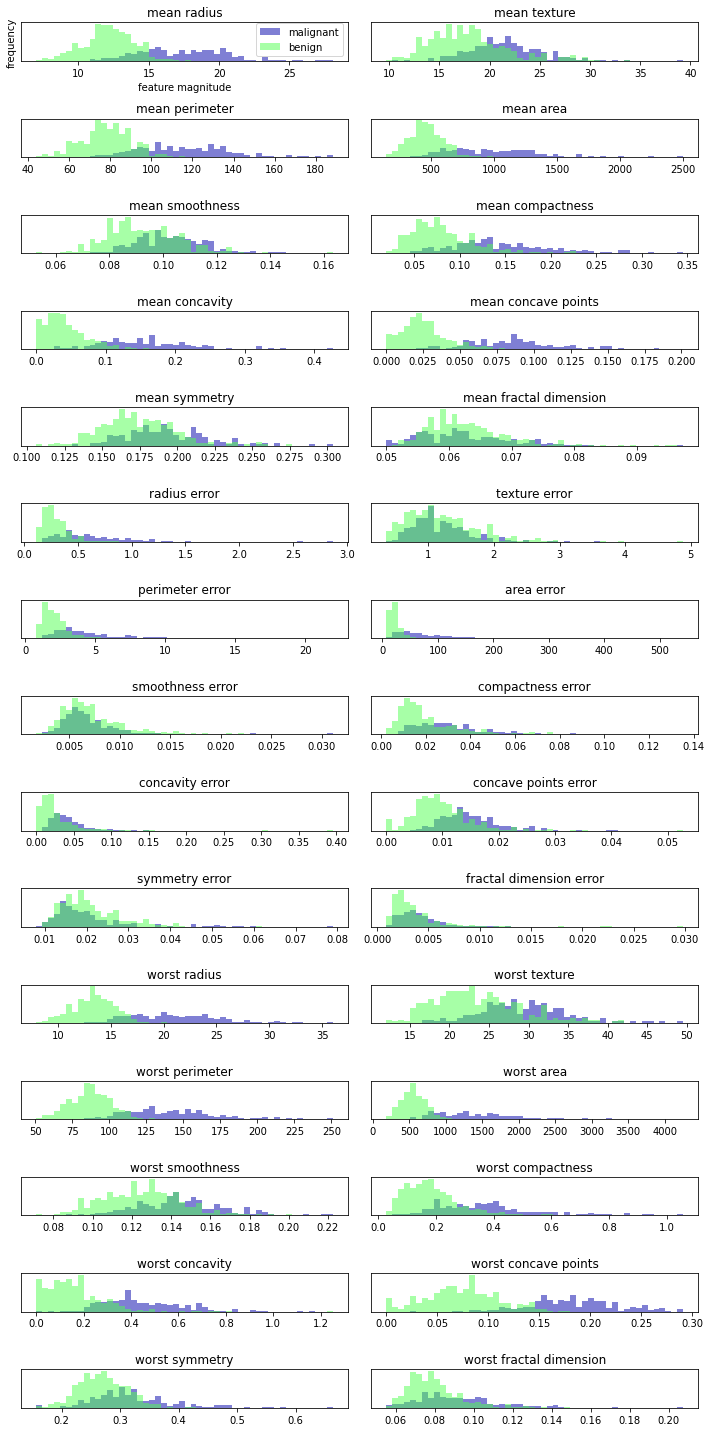

In [8]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(len(ax)):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('feature magnitude')
ax[0].set_ylabel('frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_trs = scaler.transform(X_train)
X_tes = scaler.transform(X_test)

In [14]:
pca = PCA(n_components=2)
pca.fit(X_trs)

X_pca = pca.transform(X_trs)

print(X_trs.shape)
print(X_pca.shape)


(426, 30)
(426, 2)


Text(0, 0.5, 'second principle component')

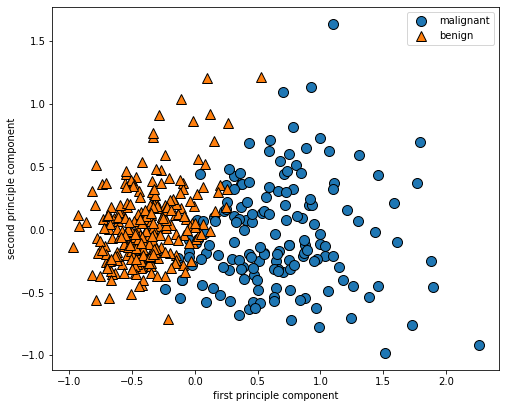

In [16]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_train)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("first principle component")
plt.ylabel("second principle component")

In [17]:
print("PCA components shape: ", pca.components_.shape)

PCA components shape:  (2, 30)


In [19]:
pca.components_

array([[ 0.24304043,  0.09272195,  0.25150513,  0.21318183,  0.13113979,
         0.23069319,  0.32421384,  0.32658091,  0.10164104,  0.04329436,
         0.11727298,  0.00415305,  0.11504734,  0.10053578, -0.00708443,
         0.11614249,  0.07614985,  0.15718677,  0.01239762,  0.05639247,
         0.25462507,  0.10773342,  0.25387616,  0.19949021,  0.12282727,
         0.21906197,  0.22730706,  0.3588641 ,  0.08371624,  0.11628702],
       [-0.26501144, -0.04160014, -0.24285805, -0.23175439,  0.23309923,
         0.18956926,  0.08832042, -0.0261306 ,  0.19388076,  0.37928357,
        -0.06856345,  0.07059276, -0.05492024, -0.08333118,  0.14160634,
         0.19508265,  0.09904087,  0.10350796,  0.13530938,  0.1952338 ,
        -0.23882507, -0.02288047, -0.20795636, -0.19159671,  0.25072024,
         0.20916504,  0.12829799,  0.0348086 ,  0.14716903,  0.31142878]])

Text(0, 0.5, 'principal components')

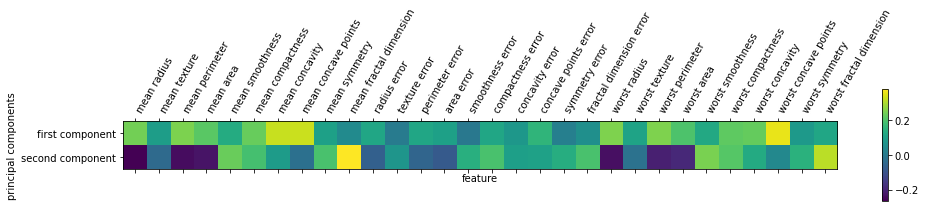

In [21]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['first component', 'second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('feature')
plt.ylabel('principal components')

In [22]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=.7)
image_shape = people.images[0].shape

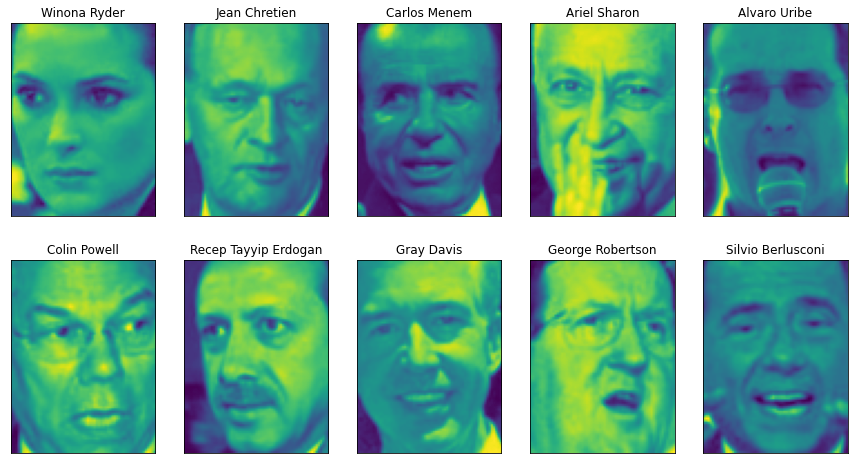

In [31]:
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks':(), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [30]:
people.images.shape, len(people.target_names)

((3023, 87, 65), 62)

In [79]:
names = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   Carlos Menem               21   Colin Powell              236   David Beckham              31   Donald Rumsfeld           121   George Robertson           22   George W Bush             530   Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   Jiang Zemin                20   John Ash

In [80]:
mask = np.zeros(people.target.shape, dtype=np.bool)

In [82]:
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

In [84]:
X_people = people.data[mask]
y_people = people.target[mask]

In [95]:
X_people = X_people / 255

In [97]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [104]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [105]:
print('score on training set: ', knn.score(X_train, y_train))
print('score on testing set: ', knn.score(X_test, y_test))

score on training set:  1.0
score on testing set:  0.23449612403100775


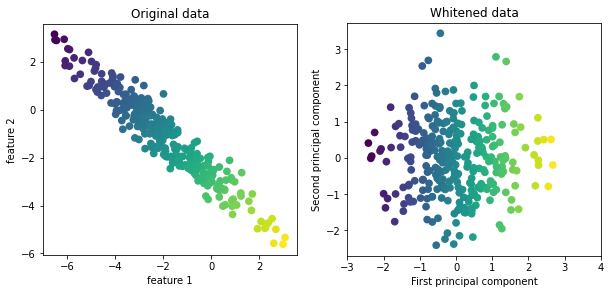

In [106]:
mglearn.plots.plot_pca_whitening()

In [110]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

In [111]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [112]:
print('X_train_pca shape: ', X_train_pca.shape)

X_train_pca shape:  (1547, 100)


In [115]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.3062015503875969

In [295]:
pca.components_.shape
X_train_pca[0].shape

(100,)

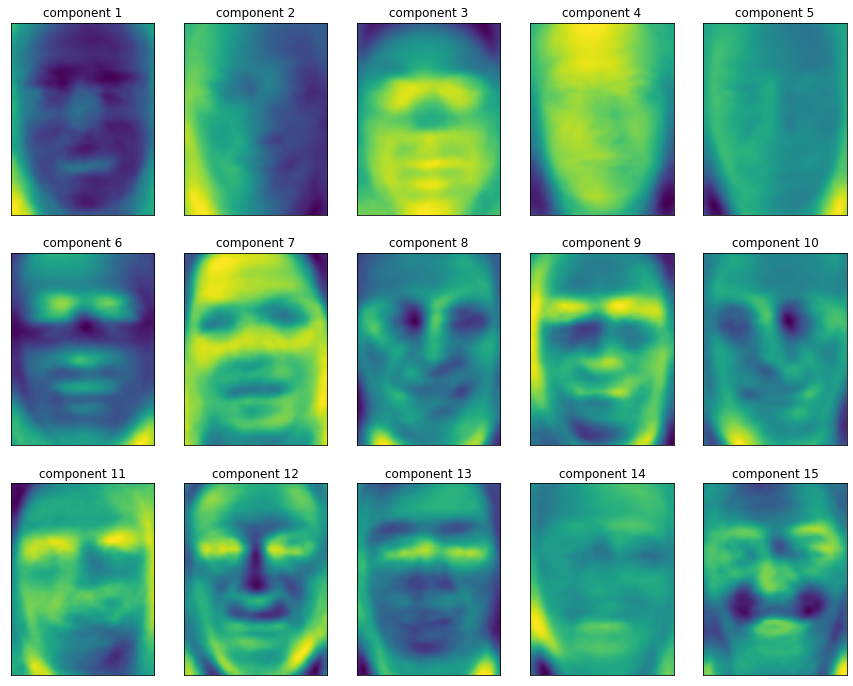

In [178]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title(f'component {i+1}')

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 4.2s, 0.1min


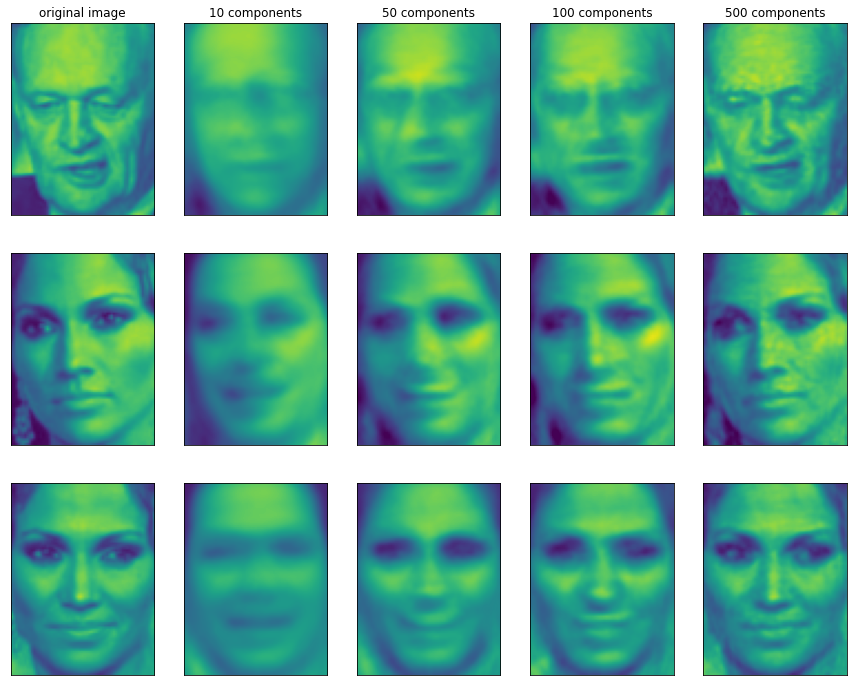

In [241]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

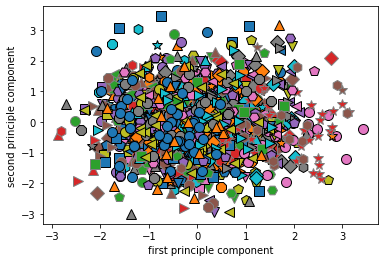

In [245]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('first principle component')
_ = plt.ylabel('second principle component')

c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\aboud\appdata\local\program

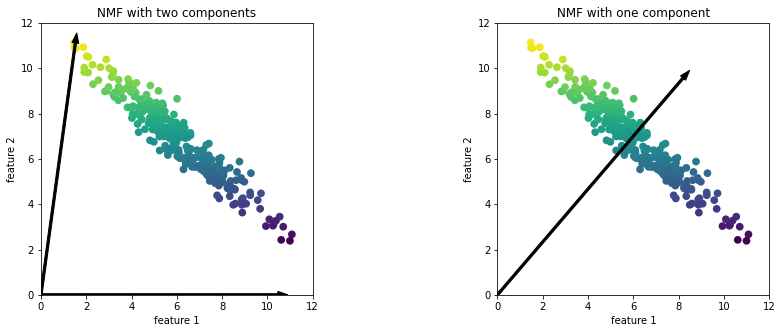

In [267]:
mglearn.plots.plot_nmf_illustration()

In [ ]:
_ = mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


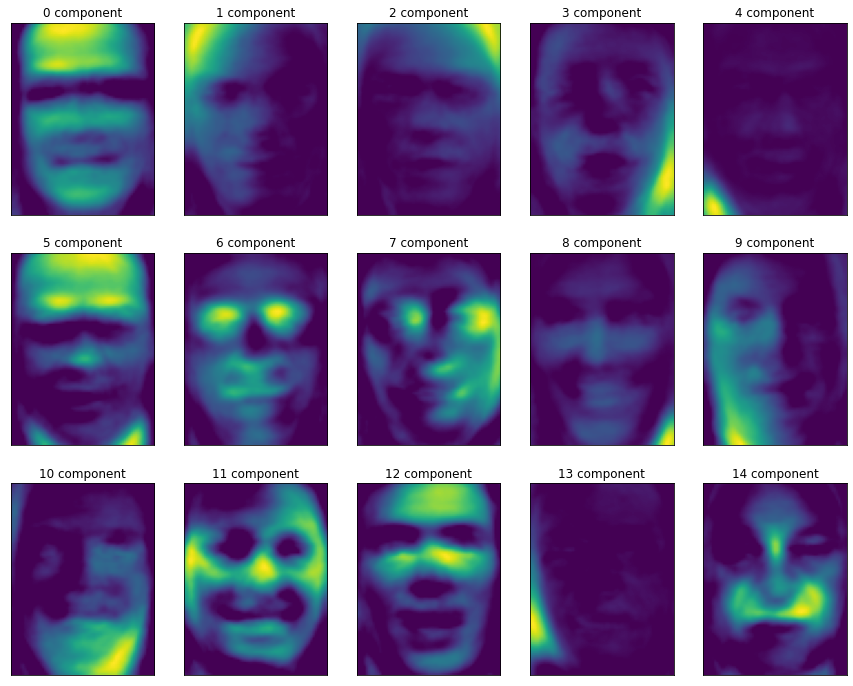

In [297]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title(f"{i} component")

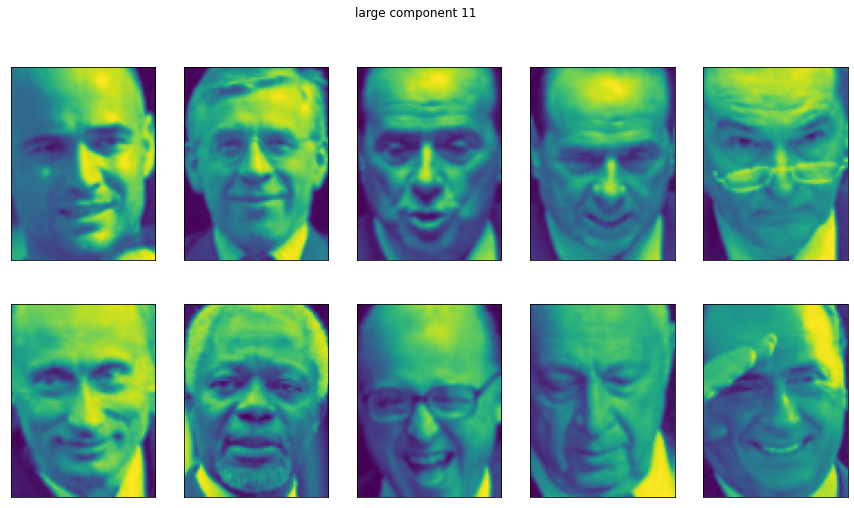

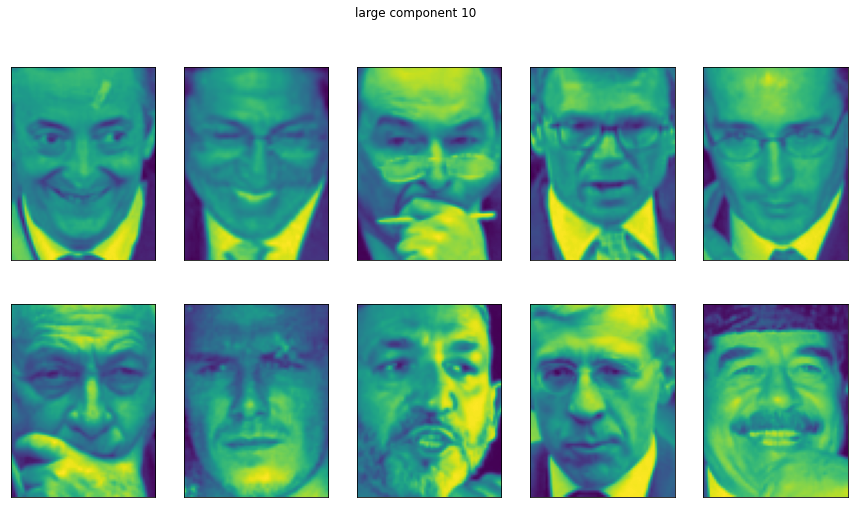

In [309]:
compn = 5
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("large component 11")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
    
compn = 10
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle(f"large component {compn}")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'signal')

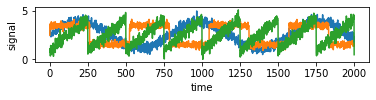

In [313]:
s = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(s, '-')
plt.xlabel('time')
plt.ylabel('signal')

In [318]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(s, A.T)

In [327]:
nmf = NMF(n_components=3, random_state=42)
s_ = nmf.fit_transform(X)

c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [328]:
pca = PCA(n_components=3, random_state=42)
H = pca.fit_transform(X)

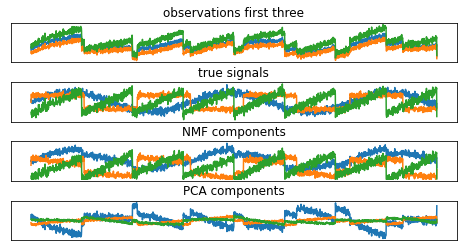

In [329]:
models = [X, s, s_, H]
names = ['observations first three',
        'true signals',
        'NMF components',
        'PCA components']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

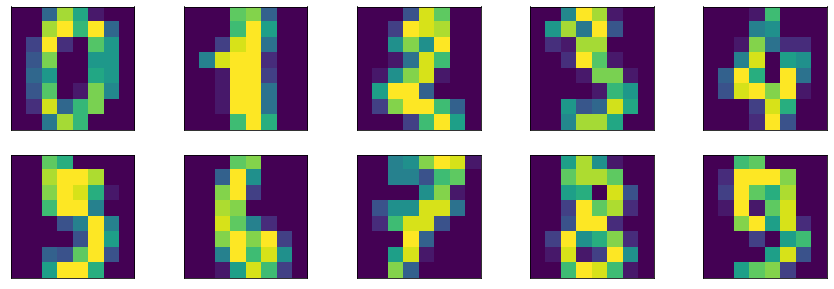

In [8]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(15,5),
                        subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)


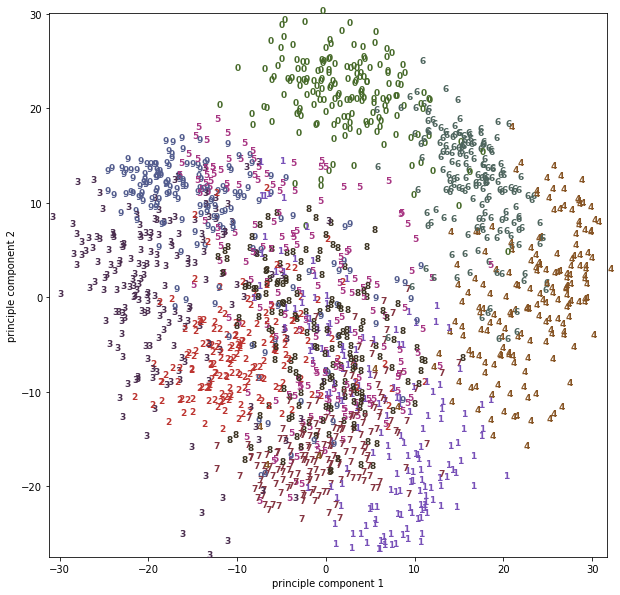

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
         "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('principle component 1')
_ = plt.ylabel('principle component 2')

In [25]:
from sklearn.manifold import TSNE

In [31]:
tsne = TSNE(random_state=402)
digits_tsne = tsne.fit_transform(digits.data)

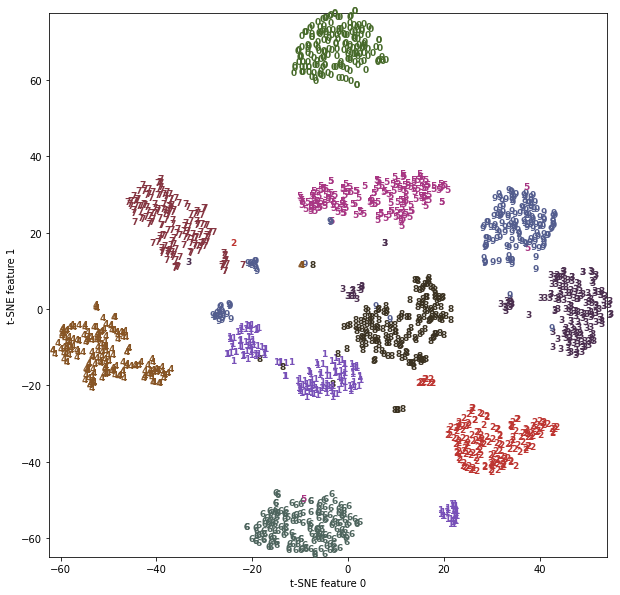

In [32]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
_ = plt.ylabel("t-SNE feature 1")